## **Part B** 

# **Libraries**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# 1) Load the Iris dataset

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['Species'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2) Drop the petal length and petal width features to form a 2D Iris dataset

In [3]:
iris_2d = df.drop(['petal length (cm)','petal width (cm)'] , axis = 1)
iris_2d.head()

,sepal length (cm),sepal width (cm),Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [4]:
#function for calculating 1D dataset likelihoods
def likelihood_1d(mean , var , x):
    mean = mean
    var = var
    numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    prob = numerator / denominator
    return prob

# 3) Model I of iris dataset
1. applying gaussian naive bayes on 2D iris dataset.
2. plotting likelihood of sepal length feature only.
2. plotting posterior of 2D dataset.
3. Calculating the Accuracy.

**1. Applying Gaussian Naive Bayes**

In [5]:
#Create a Gaussian Classifier
model1 = GaussianNB()

# Train the model using the training sets
model1.fit(iris_2d.iloc[:,:2],iris_2d.iloc[:,-1])

GaussianNB(priors=None, var_smoothing=1e-09)

**2. Plotting the likelihood of sepal length only.**

In [6]:
#taking the variance and standard deviation of first feature only.
var_1d = model1.sigma_[:,0]
mean_1d = model1.theta_[:,0]

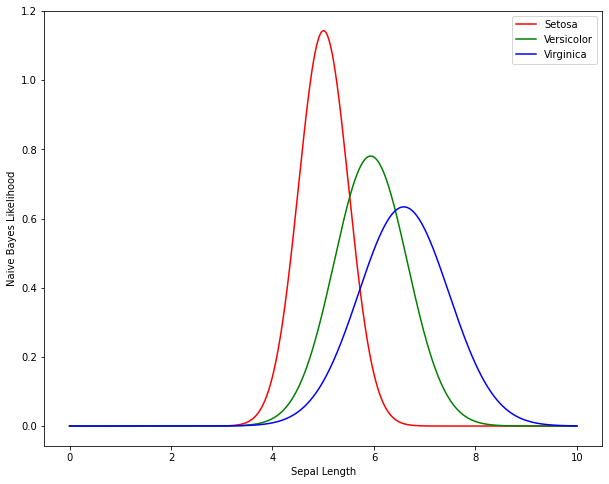

In [7]:
x = np.arange(0 , 10 ,0.001)
C0_likelihood = likelihood_1d(mean_1d[0],var_1d[0],x)
C1_likelihood = likelihood_1d(mean_1d[1],var_1d[1],x)
C2_likelihood = likelihood_1d(mean_1d[2],var_1d[2],x)


plt.figure(figsize=(10,8))
plt.plot(x , C0_likelihood , label = 'Setosa' , color = 'r')
plt.plot(x , C1_likelihood , label = 'Versicolor' , color = 'g')
plt.plot(x , C2_likelihood , label = 'Virginica' , color = 'b')
plt.ylabel('Naive Bayes Likelihood')
plt.xlabel('Sepal Length')

plt.legend()
plt.show()

**3. plotting posterior of 2D dataset.**

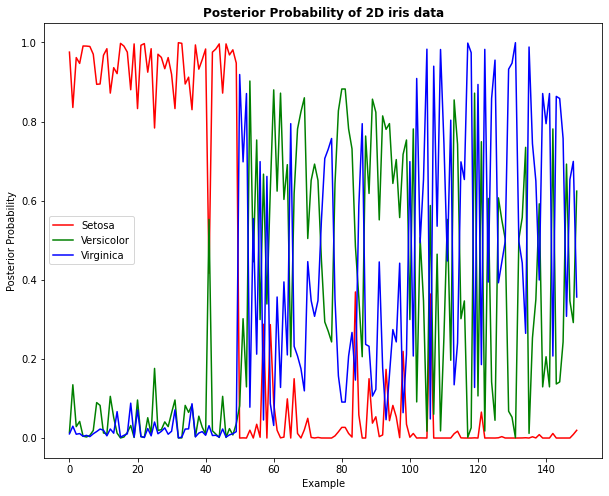

In [8]:
prob2 = model1.predict_proba(iris_2d.iloc[:,:2])

x = np.arange(0,iris_2d.shape[0])

plt.figure(figsize=(10,8))
plt.plot(x , prob2[:,0] , label = 'Setosa' , color = 'r')
plt.plot(x , prob2[:,1] , label = 'Versicolor' , color = 'g')
plt.plot(x , prob2[:,2] , label = 'Virginica' , color = 'b')
plt.title('Posterior Probability of 2D iris data' , fontweight ="bold")
plt.xlabel('Example')
plt.ylabel('Posterior Probability')

plt.legend()
plt.show()

**4. Calculating the Accuracy.**

In [9]:
accuracy = model1.score(iris_2d.iloc[:,:2],iris_2d.iloc[:,-1])
print(f'Accuracy of the model = {accuracy * 100} %\n')

Accuracy of the model = 78.0 %



# 4)1) Model II of iris dataset 

   **mu1 = mu2 = mu3 = 5.5 and keep the actual values of sigma1, sigma2, and sigma3 for the first feature.**
 
1. applying gaussian naive bayes on 2D iris dataset.
2. plotting likelihood of sepal length feature only.
2. plotting posterior of 2D dataset.
3. Calculating the Accuracy.

**1. Applying Gaussian Naive Bayes**

In [10]:
#Create a Gaussian Classifier
model2 = GaussianNB()

# Train the model using the training sets
model2.fit(iris_2d.iloc[:,:2],iris_2d.iloc[:,-1])
model2.theta_[:,0] = [5.5,5.5,5.5]
print(f'New means of the model =\n {model2.theta_}')

New means of the model =
 [[5.5   3.428]
 [5.5   2.77 ]
 [5.5   2.974]]


**2. Plotting the likelihood of sepal length only.**

In [11]:
var_1d = model2.sigma_[:,0]
mean_1d = model2.theta_[:,0]

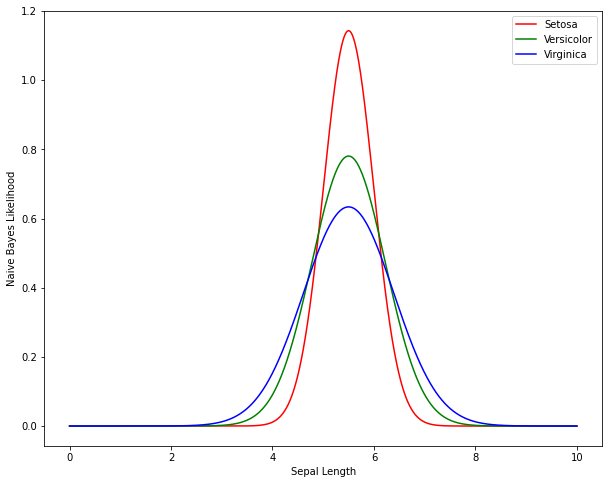

In [12]:
x = np.arange(0 , 10 ,0.001)
C0_likelihood = likelihood_1d(mean_1d[0],var_1d[0],x)
C1_likelihood = likelihood_1d(mean_1d[1],var_1d[1],x)
C2_likelihood = likelihood_1d(mean_1d[2],var_1d[2],x)


plt.figure(figsize=(10,8))
plt.plot(x , C0_likelihood , label = 'Setosa' , color = 'r')
plt.plot(x , C1_likelihood , label = 'Versicolor' , color = 'g')
plt.plot(x , C2_likelihood , label = 'Virginica' , color = 'b')
plt.ylabel('Naive Bayes Likelihood')
plt.xlabel('Sepal Length')

plt.legend()
plt.show()

**3. Plotting posterior of 2D dataset.**

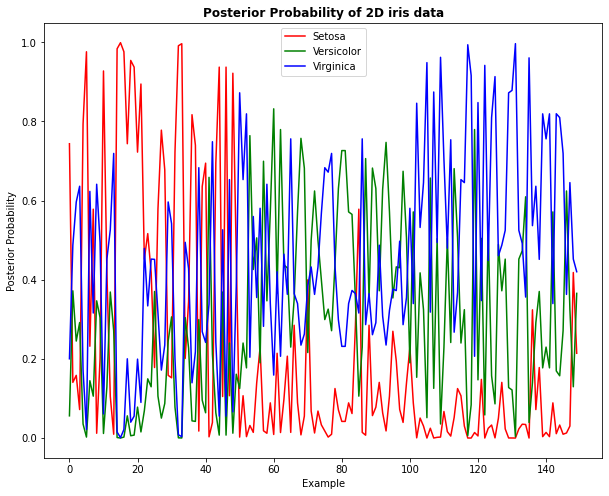

In [13]:
prob2 = model2.predict_proba(iris_2d.iloc[:,:2])

import matplotlib.pyplot as plt
x = np.arange(0,iris_2d.shape[0])

plt.figure(figsize=(10,8))
plt.plot(x , prob2[:,0] , label = 'Setosa' , color = 'r')
plt.plot(x , prob2[:,1] , label = 'Versicolor' , color = 'g')
plt.plot(x , prob2[:,2] , label = 'Virginica' , color = 'b')
plt.title('Posterior Probability of 2D iris data' , fontweight ="bold")
plt.xlabel('Example')
plt.ylabel('Posterior Probability')

plt.legend()
plt.show()

**4. Calculating the Accuracy.**

In [14]:
accuracy = model2.score(iris_2d.iloc[:,:2],iris_2d.iloc[:,-1])
print(f'Accuracy of the model = {accuracy * 100} %\n')

Accuracy of the model = 62.66666666666667 %



# 4)2) Model III of iris dataset 

   **sigma1 = sigma2 = sigma3 = 0.26 and keep the actual values of mu1, mu2, and mu3 for the first feature.**
 
1. applying gaussian naive bayes on 2D iris dataset.
2. plotting likelihood of sepal length feature only.
2. plotting posterior of 2D dataset.
3. Calculating the Accuracy.

**1. Applying Gaussian Naive Bayes**

In [15]:
#Create a Gaussian Classifier
model3 = GaussianNB()

# Train the model using the training sets
model3.fit(iris_2d.iloc[:,:2],iris_2d.iloc[:,-1])
model3.sigma_[:,0] = [0.26,0.26,0.26]
print(model3.sigma_)

[[0.26     0.140816]
 [0.26     0.0965  ]
 [0.26     0.101924]]


**2. Plotting the likelihood of sepal length only.**

In [16]:
var_1d = model3.sigma_[:,0]
mean_1d = model3.theta_[:,0]


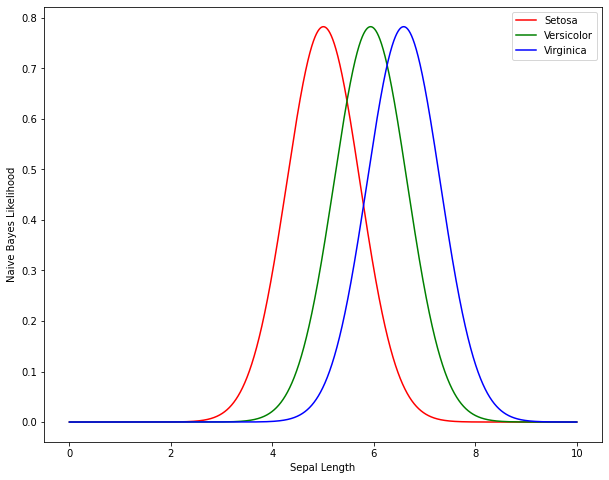

In [17]:
x = np.arange(0 , 10 ,0.001)
C0_likelihood = likelihood_1d(mean_1d[0],var_1d[0],x)
C1_likelihood = likelihood_1d(mean_1d[1],var_1d[1],x)
C2_likelihood = likelihood_1d(mean_1d[2],var_1d[2],x)


plt.figure(figsize=(10,8))
plt.plot(x , C0_likelihood , label = 'Setosa' , color = 'r')
plt.plot(x , C1_likelihood , label = 'Versicolor' , color = 'g')
plt.plot(x , C2_likelihood , label = 'Virginica' , color = 'b')
plt.ylabel('Naive Bayes Likelihood')
plt.xlabel('Sepal Length')

plt.legend()
plt.show()

**3. Plotting posterior of 2D dataset.**

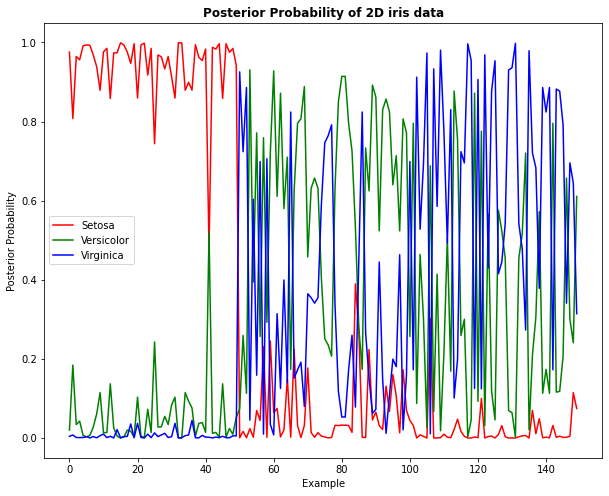

In [18]:
prob3 = model3.predict_proba(iris_2d.iloc[:,:2])

x = np.arange(0,iris_2d.shape[0])

plt.figure(figsize=(10,8))
plt.plot(x , prob3[:,0] , label = 'Setosa' , color = 'r')
plt.plot(x , prob3[:,1] , label = 'Versicolor' , color = 'g')
plt.plot(x , prob3[:,2] , label = 'Virginica' , color = 'b')
plt.title('Posterior Probability of 2D iris data' , fontweight ="bold")
plt.xlabel('Example')
plt.ylabel('Posterior Probability')

plt.legend()
plt.show()

**4. Calculating the Accuracy.**

In [19]:
accuracy = model3.score(iris_2d.iloc[:,:2],iris_2d.iloc[:,-1])
print(f'Accuracy of the model = {accuracy * 100} %\n')

Accuracy of the model = 80.0 %



# 4)3) Comparing Accuracy & Comment

Model 1 accuracy = 78.0 %

Model 2 accuracy = 62.67 %

Model 3 accuracy = 80.0 %

**Conclusion:**

1. when we fix the mean, the accuracy decrease because the data is centered around the same mean of each class, and the probability of setosa is the largest, so a large amount of data are misclassified due to the overlapping in the wide range around the mean of each class.

2. When we use a small variance for our data, It will indicate that numbers in the set are near to the mean and near to each other. So, it will improve the classification of classes and the accuracy will increase. Reducing variance treats all deviations from the mean like the same regardless of their direction.


